#Practice Project on NLP and RNNs


In this notebook, we will consider a text classification task and try solving it with several basic NLP models:
* bag-of-words + linear model
* word2vec + linear model
* recurrent neural networks
* long short-term memories

Particularly, we will be building a classifier which predicts whether a movie review is positive or negative.

# Part 0: Download data

A library called `dataget` is used to download data, as it provides a convenient interface for the dataset we want to use, [IMDB](https://ai.stanford.edu/~amaas/data/sentiment/). If you wish to work with your custom dataset, you can upload it to Google Colab directly, download it with `!wget <link_to_dataset>` or to search for libraries which can download it for you.

In [ ]:
!pip install dataget
# Google Colab has only some of python libraries preinstalled
# others can be downloaded with pip, ! means using a command line tool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.1 MB/s eta 0:00:00
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7905 sha256=4d056d27eb88cc7ff0902a8ea7b8b737f48a7912cd8f51a879368aad126a174c
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet

In [ ]:
import dataget

df_train, df_test = dataget.text.imdb_reviews().get()

df_train.reset_index(drop=True, inplace=True)

Extracting aclImdb_v1.tar.gz: 100%|██████████| 100019/100019 [00:13<00:00, 7335.84it/s]


In [ ]:
df_train.head()
# we will need a "text" field and a "label" field

,text_path,text,label
0,data/text_imdb_reviews/aclImdb/train/pos/10841...,If you need cheering up on a cold weekday even...,1
1,data/text_imdb_reviews/aclImdb/train/pos/835_8...,Pierce Brosnan the newest but no longer James ...,1
2,data/text_imdb_reviews/aclImdb/train/pos/5994_...,"I had pleasure to watch the short film ""The Cu...",1
3,data/text_imdb_reviews/aclImdb/train/pos/9963_...,I saw this movie when I was a little girl. And...,1
4,data/text_imdb_reviews/aclImdb/train/pos/7329_...,I really enjoyed this movie. The humor was a b...,1


In [ ]:
# are positive and negative classes balanced? -> yes
df_test["label"].value_counts()

1    12500
0    12500
Name: label, dtype: int64

# Part 1: Preprocessing and Bag-of-words + Linear classificaion

In [ ]:

# load libraries commonly used in machine learning
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Examples of texts:

In [ ]:
df_train["text"][[345, 134, 112, 10000]].values

array(["I dug out from my garage some old musicals and this is another one of my favorites. It was written by Jay Alan Lerner and directed by Vincent Minelli. It won two Academy Awards for Best Picture of 1951 and Best Screenplay. The story of an American painter in Paris who tries to make it big. Nina Foch is a sophisticated lady of means and is very interested in helping him, but soon finds she loves the guy. Meanwhile Gene Kelly falls for lovely damsel, Leslie Caron. His main dancing partner, and I must say they are fantastic together on the floor and otherwise. Famous French singer Georges Guietary sings, too. So if you like good smooth dancing and fun filled scenes filled with Oscar Levant's nimble piano fingers, the songs of George Gershwyn will live on forever in this colorful gem. 8/10",
       'In New Orleans, an illegal immigrant feels sick and leaves a poker game while winning the smalltime criminal Blackie (Walter Jack Palance). He is chased by Blackie and his men Raymond F

Preprocessing: let's remove tags, punctuation and apply lowercasing. [3 points]

__Tools:__ for preprocessing, module `re` is commonly used. Actually, whatever you need to do with textual data, the easiest way is to google each step and copy commands from the first (usually StackOverflow) link :)

In [ ]:
import re, string

# purpose of this function (1 point for each):
#  1. remove tags (things like <...>)
#  2. remove punctuation and make all letters lowercase
#  3. remove duplicate spaces, e.g. '     ' -> ' '
def process_string(text):
  # TODO
  text = re.sub('<.*?>', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation)).lower()
  text = re.sub('\s+', ' ', text).strip()
  return text

# demo
print("Example of a preprocessed text:")
print(process_string(df_train["text"][112]))

Example of a preprocessed text:
i am surprised at imdbs low rating of this movie with all due respect its low rating is representative of the iq level of those who rated it so poor they would rather see a movie with cheap thrills a bigger budget and more gorethe first misconception by people is that this is a horror film it is not nor does the film mislead you into believing it is one it is a psychological thriller it is for people who actually want an intellectual experience when watching a movie reelcoms review is the perfect example of how i feel about this movie all the other negative reviews doesnt make much sense its almost as if trying to make an original movie for a change very rare these days is something bad and not worth iti will reveal some spoilers for the morons who said it was boring and didnt make sense martha was brainwashing herself and performing experiments on herself to be a caring mother while she really was an evil nazi who would kill without warning the evidence

In [ ]:
# after having a working process_string, apply your function to train and test datasets
df_train["text"] = df_train["text"].apply(process_string)
df_test["text"] = df_test["text"].apply(process_string)

Let's build a simplest model: bag-of-words [10 points] + linear classification [10 points]

__Tools__: for this task, `sklearn` is the most common choice. We have discussed both these concepts in class, but a more detailed tutorial on text classification with bag of words and linear models in `sklearn` can be found [here](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [ ]:
# 1. bag-of-words extractor (5 points)
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=5)
X_train, X_test = df_train["text"], df_test["text"]

# when in doubt, you should first Google how to use CountVectorizer
# as a hint, you need to use functions fit_transform() and transform() - think about which function is appropriate for train and test
X_train_counts = count_vect.fit_transform(X_train) # TODO: counts frequency and builds binary vectors
X_test_counts = count_vect.transform(X_test) # TODO: only builds binary vectors

print("Train shape:", X_train_counts.shape, "Test shape:", X_test_counts.shape)

Train shape: (25000, 29212) Test shape: (25000, 29212)


In [ ]:
# 2. logistic regression (5 points)
y_train = df_train["label"]
y_test = df_test["label"]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create a model to performance logistic regression on
# train the model using (X_train_counts, y_train) and test accuracy on (X_test_counts, y_test)
model = LogisticRegression()# TODO: define the simple Logistic Regression model
# TODO: train the model using fit()
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts) # TODO: test accuracy on testing data using predict()
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8642


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Some explanations:
* You will learn about bag of words as a simple model for assigning vectors to text and enable vector algebra to manipulate text. Each sentence is a vector of size = # of words in the text corpus. And values are integer values denoting count of each word in that sentence.
* We talked about logistic regression early in the course (linear regression+sigmoid). This is NOT a deep neural network model. So your model does not have layer after layer. When in doubt, google how to initialize a model.
* In bag of words, we decided to specify `min_df=5` (only keep words which occured in at least 5 documents): the linear model's weight for rare words will be updated very rarely and will not go far from the initial random initialization. You can play around with this, and see what it does to very rare words.
* `X_train_counts` and `X_test_counts` are matrices which contain a lot of 0's and only a small amount of other integers
* There quite a lot of hyperparameters in `CountVectorizer` and `LogisticRegression`, tuning which can potentially increase performance (see an optional Exercise 1 below).
* We use a simplest metric, accuracy, as it is very easy to interpret (this is a portion of examples for which we made correct predictions). As we have balanced classes and binary classiication, we say that everything below 50% accuracy is a bad model, because 50% is an accuracy of a constant or random prediction.

You can probably increase the accuracy by tuning hyperparameters, and we will compare it to other models in the next section. You're welcome to tune in Exercise 1 for your own understanding, otherwise around >80% accuracy should be sufficient to proceed. Below we will also take a look at the resulting model weights.

Words in the vocabulary:

In [ ]:
words = count_vect.get_feature_names_out()
words[500:530]

array(['accompanies', 'accompaniment', 'accompany', 'accompanying',
       'accomplice', 'accomplices', 'accomplish', 'accomplished',
       'accomplishes', 'accomplishing', 'accomplishment',
       'accomplishments', 'accordance', 'according', 'accordingly',
       'account', 'accountable', 'accountant', 'accounted', 'accounting',
       'accounts', 'accumulated', 'accuracy', 'accurate', 'accurately',
       'accusation', 'accusations', 'accuse', 'accused', 'accuses'],
      dtype=object)

Let's look at words with highest and lowest weights:

In [ ]:
# save weights from the model and words into a dataframe
weights = pd.DataFrame({"coef": model.coef_[0],
                        "word": words})
weights = weights.sort_values(by="coef")
print('Words with lowest weights (they "vote" for the negative label)')
print(weights[:20])
print('Words with higest weights (they "vote" for the positive label)')
print(weights[-20:])

Words with lowest weights (they "vote" for the negative label)
           coef            word
7361  -2.629283  disappointment
28233 -2.447720           waste
263   -2.352079             410
19709 -2.256523          poorly
28880 -2.124767           worst
14673 -2.109125           lacks
16441 -1.911705            mess
10244 -1.751466     forgettable
14825 -1.697138       laughable
27310 -1.599210         unfunny
17159 -1.589035           mst3k
9378  -1.537050           fails
2032  -1.534935           avoid
28311 -1.523558            weak
2068  -1.496101           awful
16559 -1.449121          mildly
240   -1.448061             310
15476 -1.442981           lousy
1099  -1.435566         alright
19631 -1.425825       pointless
Words with higest weights (they "vote" for the positive label)
           coef          word
27200  1.156366    underrated
19127  1.174166     perfectly
22966  1.191338     sensitive
10033  1.195734        flight
25771  1.217004         tears
13146  1.243568    inc

The presence of words with highest weights (positive) "votes" for the positive class in the linear model, and the presence of words with lowest weights (negative) "votes" for the negative class.

__\*\*\*Exercise 1\*\*\*__

(it's completely optional and suggested for students who want to try models themselves, it's not rated and does not affect final marks.)

Machine learning models, inlcuding linear models, are very sensitive to hyperparameters and data preprocessing. One should try different options, measuring performance on the development data or using [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html), to get the best performing model. It is important to avoid using test data in hyperparameters tuning (hyperparameters are tuned during training using training data) and only use it to test the transferability of chosen configurations to _unseen_ data. Here is what we suggest you to do:

* Split `X_train["text"]` and `X_train["label"]` into "training" and development set (you can use [sklearn's train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `test_size=0.2`)
* For each of the following hyperparameters, train on the new "training" set and evaluate accuracy on the newly created development set. Choose hyperparameter configuration with highest accuracy. Then retrain the model on the full initial training set with the chosen hyperparameter configuration and compare accuracy on the _test_ set to the initial model we trained above. __The goal__ is to have higher resulting test accuracy, but without using test data in the tuning process!
* Try tuning hyperparameter `C` (regularization strength) in [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). You can consider grid `[0.001, 0.01, ..., 10, 100]`. For this specific hyperparameter, you can also use [`LogisticRegressionCV` implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html), which conducts cross-validation.
* Try using [`TfIdfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) instead of `CountVectorizer`
* Try tuning hyperparameters in `CountVectorizer` or `TfIdfVectorizer`, e.g. `min_freq`, `ngram_range`, or `binary`. See [CountVectorizer's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for the description of these hyperparameters.

# Part 2: word embeddings and linear models with them


In class we talked about assigning vectors to words such that addition of two word-vectors yields a vector that preserves the semantic information contained in the addition of two words. e.g. vector for king + vector for female yields a vector that corresponds to queen.
How do we assign vectors to words to preserve this semantic information?

The most popular model for this is called word2vec. In this assignment you'll learn the details and execute it.
Word2vec
https://d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html
Visual interpretation:
https://jalammar.github.io/illustrated-word2vec/
__Tools:__ for working with word embeddings, `gensim` is a widely used library. You can either download some pretrained embeddings (as we will do) or train embeddings on your data (with an easy-to-run command). You can find an introductory tutorial [here](https://www.nltk.org/howto/gensim.html) or [here](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html), and pretrained models are listed [here](https://github.com/RaRe-Technologies/gensim-data) (mostly English, unfortunately). Fyi, another popular choise is the `fasttext` library ([python module intro](https://fasttext.cc/docs/en/python-module.html), [command line intro](https://fasttext.cc/docs/en/unsupervised-tutorial.html), [pretrained models for 157 languages](https://fasttext.cc/docs/en/crawl-vectors.html)).

The next cell loads some pretrained model. Here a small one is chosen, to avoid long downloading, but you can try a larger one, e. g. `word2vec-google-news-300`

In [ ]:
# a smaller model, faster download and no problems with out of memory
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# a larger model, longer download and sometimes problems with out of memory,
# but better performance
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# number of words in the model
len(wv.index_to_key)

3000000

In [ ]:
# example of a word embedding
wv['paris']

array([-3.55468750e-01,  4.61425781e-02,  8.05664062e-02,  4.37500000e-01,
        1.04980469e-02,  2.18750000e-01, -1.51367188e-01, -1.09375000e-01,
       -2.28515625e-01,  5.76171875e-02, -2.24609375e-01, -2.65625000e-01,
       -3.95507812e-02, -1.37695312e-01, -8.30078125e-02,  1.52343750e-01,
        5.76171875e-02,  4.12597656e-02, -3.34472656e-02,  1.81640625e-01,
       -2.67578125e-01, -2.12890625e-01,  1.66992188e-01,  5.37109375e-02,
       -1.92382812e-01,  7.42187500e-02, -1.80664062e-01,  3.90625000e-02,
       -4.83398438e-02, -3.35937500e-01, -1.35742188e-01, -1.97265625e-01,
       -1.99218750e-01, -9.66796875e-02, -1.11328125e-01, -5.27343750e-02,
       -4.90722656e-02,  2.69531250e-01, -4.71191406e-02, -1.55273438e-01,
       -1.30859375e-01, -1.82617188e-01,  3.88671875e-01,  3.43750000e-01,
        3.47656250e-01, -1.12304688e-01,  1.42578125e-01, -6.68945312e-02,
       -1.66992188e-01,  2.14843750e-01, -2.27050781e-02,  2.96875000e-01,
        1.68945312e-01, -

In [ ]:
# example of similarity between words
print(wv.similarity("paris", "france"))
print(wv.similarity("paris", "china"))
print(wv.similarity("paris", "usa"))

0.5550796
0.30176708
0.49064648


In [ ]:
# example of finding most similar words
wv.most_similar("france")

[('spain', 0.6375302672386169),
 ('french', 0.6326055526733398),
 ('germany', 0.6314354538917542),
 ('europe', 0.6264256238937378),
 ('italy', 0.6257959008216858),
 ('england', 0.6120776534080505),
 ('european', 0.6074905395507812),
 ('belgium', 0.5972345471382141),
 ('usa', 0.5948355197906494),
 ('serbia', 0.5805614590644836)]

In [ ]:
wv.most_similar("tea")

[('Tea', 0.7009038329124451),
 ('teas', 0.6727380156517029),
 ('shape_Angius', 0.6323482990264893),
 ('activist_Jamie_Radtke', 0.5863860249519348),
 ('decaffeinated_brew', 0.5839536190032959),
 ('planter_bungalow', 0.575829029083252),
 ('herbal_tea', 0.5731174349784851),
 ('coffee', 0.5635291934013367),
 ('jasmine_tea', 0.548339307308197),
 ('Tea_NASDAQ_PEET', 0.5402544140815735)]

In [ ]:
# a classic "king - man + woman" example
wv.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118193507194519)]

In [ ]:
# tea - china + france
wv.most_similar(positive=['france','tea'], negative=['china'], topn = 1)

[('french', 0.39072176814079285)]

In [ ]:
# croissant - france + usa
wv.most_similar(positive=['usa','croissant'], negative=['france'], topn = 1)

[('latte', 0.5128536820411682)]

To play with pretrained embeddings yourself, you only need to run the cell at the beginning of Part 2.

Let's extract pretrained vectors for all words in our data, average embeddings over sequences and train logistic regression on top of the resulting features (10 points):

In [ ]:
# write a function to turn the given sentence ''text'' into a sequence of vectors, ignoring 'out of vocabulary' words
# wv is the dictionary for all word embeddings, i.e., wv[word] will give you the embedding of that word.
# Hint: 1. to check if a word is out of vocabulary, call 'word in wv' and see if it returns True or False
#       2. to get embedding for a word, call 'wv[word]'
def text_to_vector(text, wv):
    vectors = []
    # TODO: append embeddings of words in text to vectors
    words = text.split()
    for word in words:
        if word in wv:
            vectors.append(wv[word])
    return np.mean(vectors, axis=0)

# demo
print("Example of a vector computed for a text:")
print(text_to_vector(df_train["text"][112], wv))

Example of a vector computed for a text:
[ 4.65836525e-02  1.09142000e-02  2.64373627e-02  1.05224691e-01
 -6.69011697e-02  2.33923066e-02  4.68925908e-02 -5.89156672e-02
  7.58690014e-02  5.42531274e-02 -3.64322141e-02 -1.17374741e-01
 -1.49376392e-02  2.75197551e-02 -9.56709236e-02  7.66070783e-02
  3.49201113e-02  7.40961209e-02 -1.29147172e-02 -6.12665676e-02
 -1.42113185e-02  4.15780805e-02  6.81898324e-03 -1.27492743e-02
  5.99557012e-02 -2.51814462e-02 -6.87458664e-02  6.28028736e-02
  2.11230125e-02  7.56851817e-03 -4.73552793e-02  1.48255695e-02
 -5.61748408e-02  1.26760732e-02  3.45352218e-02 -2.19749603e-02
  1.03036892e-02  2.00286712e-02  3.90768573e-02  4.76434082e-02
  1.04405880e-01 -2.99833342e-02  8.96184742e-02 -5.11699263e-03
 -2.53452193e-02 -1.22515494e-02 -3.79059045e-03  2.50489339e-02
  2.98249722e-02  2.98504694e-03  1.27170878e-02  3.46329994e-02
 -9.72366333e-03  1.26300920e-02  1.89066827e-02  2.26471946e-02
 -2.49323323e-02 -5.41516095e-02  1.45381559e-02 

In [ ]:
# convert all training/testing data into word embeddings
X_train_wv = np.zeros((df_train.shape[0], wv.vectors.shape[1]))
for i, text in enumerate(df_train["text"]):
    X_train_wv[i] = text_to_vector(text, wv)# TODO: using text_to_vector() function defined above, convert each text into a word embedding vector

X_test_wv = np.zeros((df_test.shape[0], wv.vectors.shape[1]))
for i, text in enumerate(df_test["text"]):
    X_test_wv[i] = text_to_vector(text, wv)# TODO: using text_to_vector() function defined above, convert each text into a word embedding vector

In [ ]:
y_train = df_train["label"]
y_test = df_test["label"]

# check data shapes
X_train_wv.shape, X_test_wv.shape, y_train.shape, y_test.shape

((25000, 300), (25000, 300), (25000,), (25000,))

In [ ]:
# a good practice is to scale data before training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# as previous example, you will need to use functions fit_transform() and
# transform() on X_train_wv and X_test_wv
X_train_wv = scaler.fit_transform(X_train_wv)# TODO
X_test_wv = scaler.transform(X_test_wv)# TODO

In [ ]:
# train LogisticRegression with glove-wiki-gigaword-50/word2vec-google-news-300
# embeddings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()# TODO: define your logistic regression model
# TODO: train your model on (X_train_wv, y_train) using fit()
model.fit(X_train_wv, y_train)
y_pred = model.predict(X_test_wv)# TODO: test your model performance on testing data using predict
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8588


How does the accuracy differ when using 300-dim-word2vec embeddings vs 50-dimensional-glove embeddings? Explain why you expect your answer.

I think accuracy would increase using 300-dim-word2vec because there is more dimension meaning that each vector can contain more information than using 50-dimensional-glove.

Exercise 2 (20 points)

You can now try training both versions of logistic regression, with bag-of-words or pretrained embeddings, for some other dataset. You can select any dataset e. g. from [Kaggle](https://www.kaggle.com/datasets?search=text+classification) or just use the one we picked for you: the [AGNews dataset](https://paperswithcode.com/dataset/ag-news). It consists of news articles constructed by assembling titles and description fields of articles from the 4 topics (“World”, “Sports”, “Business”, “Sci/Tech”), and the task is to predict one category per text. You should decide what preprocessing you want to do (5 points), train two models (5 points each), optimize via hyperparameter tuning and tuning of things like min_df, type of embedding (glove vs word2vec) etc. (5 points).

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
dataset = load_dataset("ag_news")
# dataset["train"]["text"], dataset["test"]["text"]
# dataset["train"]["label"], dataset["test"]["label"]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

#### Preprocessing

In [ ]:
import pandas as pd

df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

In [ ]:
df_train.reset_index(drop=True, inplace=True)
X_train = df_train['text']
y_train = df_train['label']
X_test = df_test['text']
y_test = df_test['label']

In [ ]:
X_train[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [ ]:
import re
import string


def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Assuming you have a DataFrame 'df' with columns 'text' and 'label'
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [ ]:
X_train[0]

'wall st bears claw back into the black reuters reuters shortsellers wall streets dwindlingband of ultracynics are seeing green again'

#### Bag-of-words + Linear classificaion

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

count_vect = CountVectorizer(min_df=3)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

print("Train shape:", X_train_counts.shape, "Test shape:", X_test_counts.shape)

model = LogisticRegression()
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)
print("Accuracy:", accuracy_score(y_test, y_pred))

Train shape: (120000, 37198) Test shape: (7600, 37198)
Accuracy: 0.9086842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### some fine-tuning for bag-of-words count vectorizer

In [ ]:
min_df_values = [1, 2, 3, 4, 5, 10, 20]

best_accuracy = 0
best_min_df = 0

for min_df in min_df_values:
    count_vect = CountVectorizer(min_df=min_df)
    X_train_counts = count_vect.fit_transform(X_train)
    X_test_counts = count_vect.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_counts, y_train)

    y_pred = model.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with min_df = {min_df}: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_min_df = min_df

print(f"Best min_df: {best_min_df} with Accuracy: {best_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 1: 0.9093421052631578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 2: 0.9090789473684211


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 3: 0.9086842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 4: 0.9086842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 5: 0.9086842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with min_df = 10: 0.9085526315789474
Accuracy with min_df = 20: 0.9048684210526315
Best min_df: 1 with Accuracy: 0.9093421052631578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Word Embeddings + Linear Classification

In [ ]:
import gensim.downloader as api
from sklearn.preprocessing import StandardScaler
wv_glove = api.load('glove-wiki-gigaword-50')
wv_word = api.load('word2vec-google-news-300')

In [ ]:
def text_to_vector(text, wv_):
    vectors = []
    words = text.split()
    for word in words:
        if word in wv_:
            vectors.append(wv_[word])
    return np.mean(vectors, axis=0)

X_train_wv_glove = np.zeros((df_train.shape[0], wv_glove.vectors.shape[1]))
X_train_wv_word = np.zeros((df_train.shape[0], wv_word.vectors.shape[1]))
for i, text in enumerate(X_train):
    X_train_wv_glove[i] = text_to_vector(text, wv_glove)
    X_train_wv_word[i] = text_to_vector(text, wv_word)

X_test_wv_glove = np.zeros((df_test.shape[0], wv_glove.vectors.shape[1]))
X_test_wv_word = np.zeros((df_test.shape[0], wv_word.vectors.shape[1]))
for i, text in enumerate(X_test):
    X_test_wv_glove[i] = text_to_vector(text, wv_glove)
    X_test_wv_word[i] = text_to_vector(text, wv_word)

scaler = StandardScaler()
X_train_wv_glove = scaler.fit_transform(X_train_wv_glove)
X_test_wv_glove = scaler.transform(X_test_wv_glove)
scaler = StandardScaler()
X_train_wv_word = scaler.fit_transform(X_train_wv_word)
X_test_wv_word = scaler.transform(X_test_wv_word)

model2 = LogisticRegression()
model2.fit(X_train_wv_glove, y_train)
y_pred2 = model2.predict(X_test_wv_glove)
score_glove = accuracy_score(y_test, y_pred2)
print("Glove Accuracy:", score_glove)


Glove Accuracy: 0.8747368421052631


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model3 = LogisticRegression()
model3.fit(X_train_wv_word, y_train)
y_pred3 = model3.predict(X_test_wv_word)
score_word = accuracy_score(y_test, y_pred3)
print("Word2Vector Accuracy:", score_word)

if score_glove > score_word:
  print(f"glove performs better and accuracy is:{score_glove}")
else:
  print(f"word2vector performs better and accuracy is:{score_word}")

Word2Vector Accuracy: 0.8885526315789474
word2vector performs better and accuracy is:0.8885526315789474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 3: Recurrent neural networks

Let's train recurrent neural networks on our data and compare it to previously considered linear models. Here we will need more code.

#### 3.1 Tokenization (2 points)

The first step is tokenizing our data, i. e. segmenting words into subwords.

__Tools__: for this task, `sentencepiece` ([link](https://github.com/google/sentencepiece)) is a widely used choice. With this library, you usually train tokenizer on your data (see examples by following the link). You can also try using some pretrained tokenizer, which can be found in the [Huggingface library](https://huggingface.co/docs/tokenizers/index) (this library of course also allows training your custom tokenizers). We will use the popular [GPT2 pretrained tokenizer](https://huggingface.co/docs/transformers/model_doc/gpt2) which was trained on a large English corpora. Huggingface also provides multilingual tokenizers, e. g. [BLOOM tokenizer](https://huggingface.co/docs/transformers/model_doc/bloom).


In [ ]:
df_train, df_test = dataget.text.imdb_reviews().get()
df_train.reset_index(drop=True, inplace=True)
df_train["text"] = df_train["text"].apply(process_string)
df_test["text"] = df_test["text"].apply(process_string)
X_train, X_test = df_train["text"], df_test["text"]
y_train = df_train["label"]
y_test = df_test["label"]
# switch back to imdb dataset

In [ ]:
!pip install transformers
# Google Colab has only some of python libraries preinstalled
# others can be downloaded with pip, ! means using a command line tool

In [ ]:
# tokenization example
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
print(tokenizer.tokenize(df_train["text"][112]))
# Ġ symbol denotes white space

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

NameError: ignored

You can see that most words in our data are quite commonly-used and are not split into subwords.

`tokenizer.tokenize` provides a nice visualization of the tokenization process, but we actually need to convert our texts into integer sequences (each integer denotes an index in the vocabulary):

In [ ]:
print(tokenizer.encode(df_train["text"][112]))

[5661, 318, 281, 4998, 3807, 290, 477, 286, 262, 10544, 290, 49798, 290, 845, 922, 772, 996, 617, 286, 262, 10544, 290, 49798, 547, 429, 845, 2968, 287, 905, 1597, 340, 3947, 588, 484, 423, 587, 7205, 1201, 484, 547, 352, 530, 614, 1468, 340, 373, 8258, 10319, 290, 655, 477, 503, 257, 845, 922, 3807, 287, 749, 3354, 1312, 655, 42547, 760, 644, 373, 1016, 284, 1645, 1306, 1312, 373, 588, 1312, 892, 428, 318, 1016, 284, 1645, 4043, 1312, 892, 428, 318, 1016, 284, 1645, 477, 2479, 2628, 481, 1842, 428, 3807, 287, 617, 3354, 1312, 714, 429, 2245, 14376, 340, 373, 523, 8258, 475, 287, 617, 3354, 1312, 373, 6635, 10319, 276, 503, 290, 1312, 714, 429, 1975, 644, 1312, 373, 4379, 1312, 716, 4753, 1016, 284, 766, 428, 3807, 757, 340, 318, 530, 286, 883, 6918, 810, 340, 18548, 651, 14262, 790, 640, 345, 766, 340, 318, 523, 43527, 913, 1312, 4753, 4313, 4379, 428, 3807]


In [ ]:
# sanity check
tokenizer.convert_ids_to_tokens([5661])

['this']

In [ ]:
# take a look at the vocabulary size
tokenizer.vocab_size

50257

In [ ]:
X_train_tok = []
for text in df_train["text"]:
    # TODO tokenize/encode the training data set and append to X_train_tok using tokenizer.encode()
    X_train_tok.append(tokenizer.encode(text))
X_test_tok = []
for text in df_test["text"]:
    # TODO tokenize/encode the testing data set and append to X_test_tok using tokenizer.encode()
    X_test_tok.append(tokenizer.encode(text))

Token indices sequence length is longer than the specified maximum sequence length for this model (1101 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
print(X_train_tok[:3])

[[64, 845, 13779, 3807, 351, 257, 1049, 4469, 2810, 416, 262, 1748, 286, 275, 5744, 290, 277, 268, 1014, 3952, 355, 257, 9283, 4336, 290, 1657, 3807, 19678, 340, 2277, 257, 44155, 403, 329, 502, 6088, 286, 22051, 290, 6088, 286, 16425, 9283, 8188, 351, 1103, 2613, 32399, 290, 1103, 10288, 284, 1613, 37284, 1140, 15536, 290, 703, 20050, 373, 340, 284, 2342, 257, 3807, 351, 257, 9283, 7505, 1231, 1719, 284, 21178, 281, 625, 496, 625, 1169, 12639, 2116, 31293, 885, 7114, 1575, 1008, 9361, 284, 787, 23142, 503, 286, 257, 4688, 5386, 474, 320, 1820, 290, 9859, 750, 257, 3734, 1693, 355, 257, 1862, 42900, 395, 30915, 3155, 7195, 422, 474, 8608, 893, 37284, 1140, 474, 1952, 340, 373, 257, 1643, 348, 36053, 290, 503, 286, 1364, 2214, 475, 612, 1107, 389, 523, 87, 3296, 326, 389, 326, 43631, 290, 2107, 511, 3160, 832, 262, 27806, 286, 511, 14142, 1074, 262, 3807, 7051, 276, 1863, 379, 257, 3049, 8761, 290, 262, 7464, 3584, 20039, 550, 262, 20024, 290, 15598, 1483, 286, 523, 867, 584, 2968, 6918

## 3.2 Vanilla RNN and LSTM

__Tools:__ for training neural networks, two most popular libraries are PyTorch and TensorFlow, we will use the first one. A tutorial on training RNNs for text classification in PyTorch: [link](https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-lstm-for-text-classification-tasks).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### 3.2.1 Clipping and padding sequences (2 points)

When we pass data to a neural network, we group sequences into mini-batches, to speed-up the training process and to improve convergence. But sequences have various lengths, while neural networks operate with matrices or tensors with fixed dimensionalities. To bring things together, we will _pad_ short sequences with some special index, e. g. 0, and clip too long sequences.  Before doing that, we need to decide on the maximum sequence length we want to work with.  Let's plot the histogram of lengths do do that:

Text(0, 0.5, 'Number of sequences')

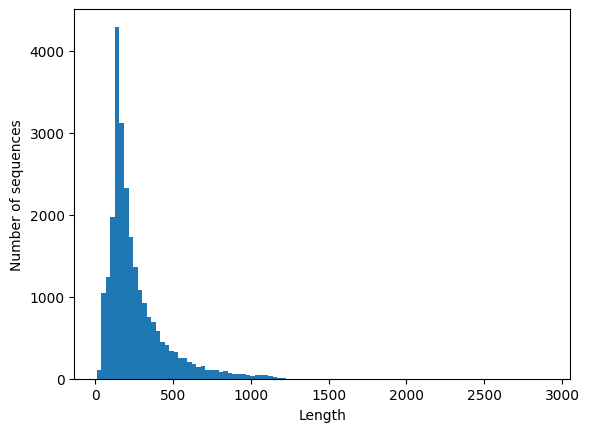

In [ ]:
_ = plt.hist([len(s) for s in X_train_tok], 100)
plt.xlabel("Length")
plt.ylabel("Number of sequences")

All tokens beyond the maximum sequence length will be clipped. Using large `max_seq_len` would accomodate all tokens, but be less time-efficient. Let's choose something in the middle, e. g. `max_seq_len=500`.

In [ ]:
max_seq_len = 500

# clip sequences: for each element in X_train_tok and X_test_tok, truncate the length of each entry at max_seq_len. Ignore what comes after.
# therefore each element has length at most max_seq_len
# hint: list comprehension is your friend, or this can be done with a loop
X_train_tok = [s[:max_seq_len] for s in X_train_tok]# TODO
X_test_tok = [s[:max_seq_len] for s in X_test_tok]# TODO

# create masks
mask_train = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_train_tok]
mask_test = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_test_tok]

# pad sequences: for each element in X_train_tok and X_test_tok, pad each
# element at the end with 0s such that each element has length exactly max_seq_len
X_train_tok = [s + [0] * (max_seq_len - len(s)) for s in X_train_tok]# TODO
X_test_tok = [s + [0] * (max_seq_len - len(s)) for s in X_test_tok]# TODO

In [ ]:
print(X_train_tok[3])
# indices at the beginning and 0's at the end
print(mask_train[:3])
# 1's at the beginning and 0's at the end

[5661, 3807, 14516, 502, 326, 617, 1468, 2042, 2330, 6918, 389, 4753, 2861, 262, 804, 15003, 1927, 1312, 550, 617, 24722, 2158, 422, 262, 3726, 286, 262, 3807, 1566, 262, 886, 1312, 373, 3144, 30829, 1312, 373, 845, 12617, 351, 262, 11710, 286, 10512, 43527, 10997, 283, 11098, 355, 2539, 16667, 1820, 308, 4066, 318, 20105, 290, 550, 502, 287, 28096, 262, 2187, 28805, 891, 12998, 751, 428, 3807, 284, 534, 1409, 2013, 432, 329, 617, 1657, 8259, 422, 262, 3360, 31193, 290, 1165, 3665, 393, 17698, 8258, 6918, 286, 1909, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### 3.2.2 Creating mini-batches

We will now define datasets which store our training and testing data, and them define data loaders which will generate mini-batches from our data.

In [ ]:
y_train = df_train["label"].values
y_test = df_test["label"].values

In [ ]:
train_dset = torch.utils.data.TensorDataset(torch.tensor(X_train_tok,
                                                         dtype=torch.long),
                                            torch.tensor(y_train,
                                                         dtype=torch.long),
                                            torch.tensor(mask_train,
                                                         dtype=torch.float))

test_dset = torch.utils.data.TensorDataset(torch.tensor(X_test_tok,
                                                        dtype=torch.long),
                                          torch.tensor(y_test,
                                                        dtype=torch.long),
                                          torch.tensor(mask_test,
                                                        dtype=torch.float))

In [ ]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2
                         )

test_loader = torch.utils.data.DataLoader(test_dset,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=2
                         )

In [ ]:
# demo
x, y, m = next(iter(train_loader))
print(x.shape, y.shape, m.shape)
# x.shape: [B, L], y.shape: [L], mask.shape: [B, L]
print(x)
print(y)
print(m)

torch.Size([128, 500]) torch.Size([128]) torch.Size([128, 500])
tensor([[   82,   385,   272,  ...,     0,     0,     0],
        [ 3829,  2431,   286,  ...,     0,     0,     0],
        [ 1169,   691,  1517,  ...,     0,     0,     0],
        ...,
        [36672, 13289,   416,  ...,     0,     0,     0],
        [ 1169,   717,   640,  ...,     0,     0,     0],
        [   68,  1455,   590,  ...,  1512,   393,   473]])
tensor([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 1])
tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        

### 3.2.3 Defining model (6 points)

In PyTorch, models are usually defined as classes, with the `__init__` method (which defines all needed components and initializes parameters) and the `forward` method (which defined how forward pass is conducted). All model hyperparameters are passed to the `__init__` method. When one create an instance of the class, one does so with specific parameter values for that instance. To do this, one calls the class and passes, in parentheses, values of the parameters defined in `__init__`.

We will have an embedding layer, one or two recurrent layers (LSTM or vanilla RNN), and one feed-forward layer to make final predictions. The feed-forward layer will take as an input the hidden states from the recurrent layer, _averaged_ over the sequence length.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# training RNNs without GPU can be veeery slow.
# you can request GPU in colab in Runtime -> Change runtime type -> GPU

In [ ]:
# you can specify rec_layer=nn.LSTM or rec_layer=nn.RNN
class RNNClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, \
                 num_rec_layers=1, rec_layer=nn.RNN):
        super(RNNClassifier, self).__init__()
        # define all layers we need,
        # their parameters will be initialized automatically

        # your model should contain the following components:
        # 1. nn.Embedding layer turning input sentences into word embeddings
        #    with input and output dimension given by vocab_size and embedding_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)# TODO

        # 2. depending on the value of num_rec_layers, the corresponding number
        #    of rec_layers (either RNN or LSTM) with batch_first=True and hidden
        #    dimension given by hidden_dim
        self.num_rec_layers = num_rec_layers
        self.rnn1 = rec_layer(embedding_dim, hidden_dim, batch_first=True)# TODO
        if self.num_rec_layers == 2:
            self.rnn2 = rec_layer(hidden_dim, hidden_dim, batch_first=True)# TODO
            # this code with if is for simplicity,
            # normally one would use torch.nn.ModuleList

        # 3. a final linear layer with sigmoid activation with input and output
        #    dimension given by hidden_dim and 1.
        self.hidden2label = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, sentences, mask):
        # sentences shape: [B, L], mask shape: [B, L]
        embedding = self.word_embeddings(sentences)# call your embedding layer, output shape: [B, L, DE]
        out, hidden = self.rnn1(embedding)# call your rnn1, output shape: [B, L, DH]
        if self.num_rec_layers == 2:
            out, hidden = self.rnn2(out)# call your rnn2, output shape: [B, L, DH]
        out = (out*mask[:, :, None]).mean(dim=1) # shape: [B, DH]
        linear_output = self.hidden2label(out)
        res = self.sigmoid(linear_output) # call your hidden2label, output shape: [B, 1]
        return res

In [ ]:
# create a particular instance of the model (the class defined above)
# let's first do a 1 layer vaniila RNN with embedding_dim=hidden_dim=128
rnn = RNNClassifier(embedding_dim = 128,hidden_dim = 128, vocab_size = tokenizer.vocab_size) # TODO
rnn.to(device)

RNNClassifier(
  (word_embeddings): Embedding(50257, 128)
  (rnn1): RNN(128, 128, batch_first=True)
  (hidden2label): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
x = x.to(device)
m = m.to(device) #had to do this to ensure they all on gpu

In [ ]:
# demo forward pass with the mini-batch that we generated above
y_pred = rnn(x, m)
y_pred.shape
print(y_pred[:10])
# at random initialization all predictions are around 0.5

tensor([[0.5151],
        [0.5136],
        [0.5127],
        [0.5115],
        [0.5123],
        [0.5153],
        [0.5153],
        [0.5124],
        [0.5132],
        [0.5111]], device='cuda:0', grad_fn=<SliceBackward0>)


### 3.2.4 Training

Finally, we define an optimizer, functions for training and evaluation, and run the training process.

In [ ]:
# RNNs are often trained with optim.RMSprop or optim.Adam
# example: optimizer = optim.RMSprop(rnn.parameters(), lr=learning_rate)
# feel free to play with lr and optimizer
learning_rate = 0.001
optimizer = optim.RMSprop(rnn.parameters(), lr=learning_rate)# TODO

lossfun = nn.BCELoss(reduction='mean')

In [ ]:
def train_epoch(train_loader, model, lossfun, optimizer, device):
    model.train()
    # iterate over mini-batches
    for it, (inputs, labels, mask) in enumerate(train_loader):
        # move everything to the device
        inputs = inputs.to(device)
        labels = labels.to(device)
        mask = mask.to(device)

        model.zero_grad()
        # forward pass
        output = model(inputs, mask)

        loss = lossfun(output.view(-1), labels.float())
        # backward pass
        loss.backward()

        # update model parameters
        optimizer.step()

def evaluate(loader, model, lossfun, device):
    model.eval()
    total_acc = 0.0
    total_loss = 0.0
    total = 0.0
    # iterate over mini-batches
    for it, (inputs, labels, mask) in enumerate(loader):
        # move everything to the device
        inputs = inputs.to(device)
        labels = labels.to(device)
        mask = mask.to(device)

        # forward pass
        output = model(inputs, mask)

        # calculate loss value
        loss = lossfun(output.view(-1), labels.float())
        total_loss += loss.item()

        # calculate test accuracy
        pred = output.view(-1) > 0.5
        correct = (pred == labels.bool())
        total_acc += torch.sum(correct).item() / len(correct)

    total = it + 1
    return total_loss / total, total_acc / total


def train(train_loader, test_loader, model, lossfun, optimizer, \
          device, num_epochs):
    train_loss_ = []
    test_loss_ = []
    train_acc_ = []
    test_acc_ = []
    # irerate over training epochs
    for epoch in range(num_epochs):
        # at each step, we do a training epoch and evaluate on train and test data
        train_epoch(train_loader, model, lossfun, optimizer, device)
        train_loss, train_acc = evaluate(train_loader, model, lossfun, device)
        train_loss_.append(train_loss)
        train_acc_.append(train_acc)
        test_loss, test_acc = evaluate(test_loader, model, lossfun, device)
        test_loss_.append(test_loss)
        test_acc_.append(test_acc)

        print(f'Epoch: {epoch+1:3d}/{num_epochs:3d} '
              f'Training Loss: {train_loss_[epoch]:.3f}, Testing Loss: {test_loss_[epoch]:.3f}, '
              f'Training Acc: {train_acc_[epoch]:.3f}, Testing Acc: {test_acc_[epoch]:.3f}')

    return train_loss_, train_acc_, test_loss_, test_acc_


_Popular mistake:_ If you make changes to the model and want to rerun training, do not forget to redefine an optimizer, otherwise your optimizer would be disconnected from the model and training will not affect model parameters.

In [ ]:
# let's first train a vanilla RNN
a, b, c, d = train(train_loader, test_loader, rnn, lossfun, \
                   optimizer, device, num_epochs=30)

Epoch:   1/ 30 Training Loss: 0.415, Testing Loss: 0.465, Training Acc: 0.833, Testing Acc: 0.797
Epoch:   2/ 30 Training Loss: 0.385, Testing Loss: 0.484, Training Acc: 0.838, Testing Acc: 0.798
Epoch:   3/ 30 Training Loss: 0.257, Testing Loss: 0.406, Training Acc: 0.904, Testing Acc: 0.830
Epoch:   4/ 30 Training Loss: 0.231, Testing Loss: 0.384, Training Acc: 0.919, Testing Acc: 0.841
Epoch:   5/ 30 Training Loss: 0.220, Testing Loss: 0.430, Training Acc: 0.918, Testing Acc: 0.825
Epoch:   6/ 30 Training Loss: 0.144, Testing Loss: 0.509, Training Acc: 0.949, Testing Acc: 0.835
Epoch:   7/ 30 Training Loss: 0.136, Testing Loss: 0.405, Training Acc: 0.958, Testing Acc: 0.845
Epoch:   8/ 30 Training Loss: 0.090, Testing Loss: 0.610, Training Acc: 0.970, Testing Acc: 0.836
Epoch:   9/ 30 Training Loss: 0.129, Testing Loss: 0.490, Training Acc: 0.952, Testing Acc: 0.833
Epoch:  10/ 30 Training Loss: 0.061, Testing Loss: 0.678, Training Acc: 0.981, Testing Acc: 0.839
Epoch:  11/ 30 Train

We have our first result!

You may note that test accuracy starts decreasing at some point. This is a common overfitting behaviour of RNNs, and usually the iteration with best performance is chosen. Ideally we should choose the best iteration on the test set.

Now let's try playing with hyperparameters and LSTMs a little bit. (2 points each = 8 points)

In [ ]:
# try using 1 layer LSTM instead of vanilla RNN, with embedding_dim=hidden_dim=128. Hint, you may want to reuse the RNNClassifier() class and then go into and redefine the layers to be LSTMs
lstm = RNNClassifier(embedding_dim = 128, hidden_dim = 128, vocab_size = tokenizer.vocab_size, num_rec_layers = 1, rec_layer = nn.LSTM)# TODO
lstm.to(device)
learning_rate = 0.001
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)# TODO
#calling the train function returns 4 variables. These get stored in a,b,c,d below.
a, b, c, d = train(train_loader, test_loader, lstm, lossfun, \
                   optimizer, device, num_epochs=30)

Epoch:   1/ 30 Training Loss: 0.457, Testing Loss: 0.510, Training Acc: 0.808, Testing Acc: 0.777
Epoch:   2/ 30 Training Loss: 0.296, Testing Loss: 0.395, Training Acc: 0.886, Testing Acc: 0.833
Epoch:   3/ 30 Training Loss: 0.226, Testing Loss: 0.359, Training Acc: 0.923, Testing Acc: 0.854
Epoch:   4/ 30 Training Loss: 0.158, Testing Loss: 0.380, Training Acc: 0.946, Testing Acc: 0.856
Epoch:   5/ 30 Training Loss: 0.119, Testing Loss: 0.406, Training Acc: 0.961, Testing Acc: 0.852
Epoch:   6/ 30 Training Loss: 0.093, Testing Loss: 0.420, Training Acc: 0.973, Testing Acc: 0.855
Epoch:   7/ 30 Training Loss: 0.072, Testing Loss: 0.463, Training Acc: 0.981, Testing Acc: 0.853
Epoch:   8/ 30 Training Loss: 0.064, Testing Loss: 0.497, Training Acc: 0.985, Testing Acc: 0.851
Epoch:   9/ 30 Training Loss: 0.048, Testing Loss: 0.563, Training Acc: 0.989, Testing Acc: 0.847
Epoch:  10/ 30 Training Loss: 0.041, Testing Loss: 0.586, Training Acc: 0.992, Testing Acc: 0.844
Epoch:  11/ 30 Train

In [ ]:
# try increasing lr while keeping everything else the same
lstm = RNNClassifier(embedding_dim = 128, hidden_dim = 128, vocab_size = tokenizer.vocab_size, num_rec_layers = 1, rec_layer = nn.LSTM)# TODO
lstm.to(device)
learning_rate = 0.01
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)# TODO
a, b, c, d = train(train_loader, test_loader, lstm, lossfun, \
                   optimizer, device, num_epochs=30)

Epoch:   1/ 30 Training Loss: 0.208, Testing Loss: 0.339, Training Acc: 0.933, Testing Acc: 0.863
Epoch:   2/ 30 Training Loss: 0.086, Testing Loss: 0.329, Training Acc: 0.978, Testing Acc: 0.873
Epoch:   3/ 30 Training Loss: 0.044, Testing Loss: 0.413, Training Acc: 0.991, Testing Acc: 0.863
Epoch:   4/ 30 Training Loss: 0.020, Testing Loss: 0.632, Training Acc: 0.996, Testing Acc: 0.859
Epoch:   5/ 30 Training Loss: 0.016, Testing Loss: 0.602, Training Acc: 0.998, Testing Acc: 0.861
Epoch:   6/ 30 Training Loss: 0.017, Testing Loss: 0.845, Training Acc: 0.995, Testing Acc: 0.854
Epoch:   7/ 30 Training Loss: 0.015, Testing Loss: 0.812, Training Acc: 0.996, Testing Acc: 0.853
Epoch:   8/ 30 Training Loss: 0.007, Testing Loss: 0.905, Training Acc: 0.999, Testing Acc: 0.854
Epoch:   9/ 30 Training Loss: 0.004, Testing Loss: 1.029, Training Acc: 0.999, Testing Acc: 0.854
Epoch:  10/ 30 Training Loss: 0.005, Testing Loss: 0.871, Training Acc: 0.999, Testing Acc: 0.852
Epoch:  11/ 30 Train

In [ ]:
# try 2 lstm layers with embedding_dim=hidden_dim=128
lstm = RNNClassifier(embedding_dim = 128, hidden_dim = 128, vocab_size = tokenizer.vocab_size, num_rec_layers = 2, rec_layer = nn.LSTM)# TODO
lstm.to(device)
learning_rate = 0.01
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)# TODO
a, b, c, d = train(train_loader, test_loader, lstm, lossfun, \
                   optimizer, device, num_epochs=15)

Epoch:   1/ 15 Training Loss: 0.183, Testing Loss: 0.311, Training Acc: 0.940, Testing Acc: 0.876
Epoch:   2/ 15 Training Loss: 0.083, Testing Loss: 0.319, Training Acc: 0.981, Testing Acc: 0.876
Epoch:   3/ 15 Training Loss: 0.039, Testing Loss: 0.446, Training Acc: 0.990, Testing Acc: 0.869
Epoch:   4/ 15 Training Loss: 0.015, Testing Loss: 0.678, Training Acc: 0.997, Testing Acc: 0.864
Epoch:   5/ 15 Training Loss: 0.011, Testing Loss: 0.793, Training Acc: 0.998, Testing Acc: 0.863
Epoch:   6/ 15 Training Loss: 0.012, Testing Loss: 0.865, Training Acc: 0.997, Testing Acc: 0.859
Epoch:   7/ 15 Training Loss: 0.014, Testing Loss: 0.924, Training Acc: 0.996, Testing Acc: 0.853
Epoch:   8/ 15 Training Loss: 0.008, Testing Loss: 0.857, Training Acc: 0.998, Testing Acc: 0.859
Epoch:   9/ 15 Training Loss: 0.004, Testing Loss: 1.111, Training Acc: 0.999, Testing Acc: 0.856
Epoch:  10/ 15 Training Loss: 0.013, Testing Loss: 1.882, Training Acc: 0.996, Testing Acc: 0.848
Epoch:  11/ 15 Train

In [ ]:
# try a larger 1 layer lstm network with embedding_dim=hidden_dim=512
lstm = RNNClassifier(embedding_dim = 512, hidden_dim = 512, vocab_size = tokenizer.vocab_size, num_rec_layers = 1, rec_layer = nn.LSTM)# TODO
lstm.to(device)
learning_rate = 0.01
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)# TODO
a, b, c, d = train(train_loader, test_loader, lstm, lossfun, \
                   optimizer, device, num_epochs=15)

Epoch:   1/ 15 Training Loss: 0.354, Testing Loss: 0.440, Training Acc: 0.872, Testing Acc: 0.820
Epoch:   2/ 15 Training Loss: 0.155, Testing Loss: 0.336, Training Acc: 0.952, Testing Acc: 0.866
Epoch:   3/ 15 Training Loss: 0.137, Testing Loss: 0.430, Training Acc: 0.953, Testing Acc: 0.841
Epoch:   4/ 15 Training Loss: 0.073, Testing Loss: 0.534, Training Acc: 0.980, Testing Acc: 0.837
Epoch:   5/ 15 Training Loss: 0.032, Testing Loss: 0.645, Training Acc: 0.992, Testing Acc: 0.846
Epoch:   6/ 15 Training Loss: 0.028, Testing Loss: 0.682, Training Acc: 0.993, Testing Acc: 0.842
Epoch:   7/ 15 Training Loss: 0.021, Testing Loss: 0.753, Training Acc: 0.996, Testing Acc: 0.840
Epoch:   8/ 15 Training Loss: 0.029, Testing Loss: 1.204, Training Acc: 0.992, Testing Acc: 0.824
Epoch:   9/ 15 Training Loss: 0.018, Testing Loss: 0.903, Training Acc: 0.995, Testing Acc: 0.834
Epoch:  10/ 15 Training Loss: 0.017, Testing Loss: 0.867, Training Acc: 0.997, Testing Acc: 0.835
Epoch:  11/ 15 Train

We could try improving RNNs' performance further by applying regularization methods (weight decay, dropout), tuning learning rate schedule (appears to be very important in practice!), using data augmentaion etc. You may play with this if you like, but this is not graded

Generally, we see that linear models are actually quite a strong baseline for relatively simple text classification. At the same time, RNNs require time-consuming hyperparameter tuning. More complex tasks, i. e. text generation or natural language understanding, are solved well only with advanced neural architectures such as Transformer.

### Playground
The function given below takes a piece of text as input and outputs the RNN's prediction (is it a positive or negative movie review). In principle it can of course process any text, not only movie reviews.

In [ ]:
def predict(text):
    text = process_string(text) # initial preprocessing
    # convert to a torch tensor of needed shape and on the needed device
    tensor = torch.tensor(tokenizer.encode(text)[:max_seq_len]).long()
    tensor = tensor.unsqueeze(0).to(device)
    mask = torch.ones(1, tensor.shape[1]).float().to(device)
    # network's prediction
    pred_rnn = rnn(tensor, mask).item()
    print("RNN prediction:", "positive" if pred_rnn>0.5 else "negative")

In [ ]:
predict("This is a nice movie with my favourite actors")

RNN prediction: positive


In [ ]:
predict("Don't spend your evening on this")

RNN prediction: negative


In [ ]:
predict("I am a deep learning researcher")

RNN prediction: negative


In [ ]:
predict("This is not a good example of a bad movie")

RNN prediction: positive


Exercise 3 (10 points)


First, you can again try training an RNN on the other dataset, as in Exercise 2. You can also implement a prediction function, like the one we have above, for any one of the two linear models which we considered above. Do you observe any changes in RNN prediction of the above statements when you use a different training set? Try feeding in your own sentences...what are some of the drawbacks/failures of this that you observe?

First let's try to feed in one of my sentences

In [ ]:
predict("There is going to be tsunami coming tomorrow")

RNN prediction: negative


Above we have used AGNews dataset succeeded from previous exercise, and we can try on another dataset which is provided in Exercise 1, IMDB dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Twitter_Data.csv to Twitter_Data.csv


In [ ]:
from sklearn.model_selection import train_test_split
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['Twitter_Data.csv']))
df = df.dropna()
df = df[df['category'] != 0]
df['category'] = df['category'].replace(-1, 0)
X = df['clean_text'] #already clean so no processing needed
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-7-4baf7d86562a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].replace(-1, 0)


In [ ]:
y_train = y_train.values
y_test = y_test.values

In [ ]:
X_train_tok = []
for text in X_train:
    # TODO tokenize/encode the training data set and append to X_train_tok using tokenizer.encode()
    X_train_tok.append(tokenizer.encode(text))
X_test_tok = []
for text in X_test:
    # TODO tokenize/encode the testing data set and append to X_test_tok using tokenizer.encode()
    X_test_tok.append(tokenizer.encode(text))

Text(0, 0.5, 'Number of sequences')

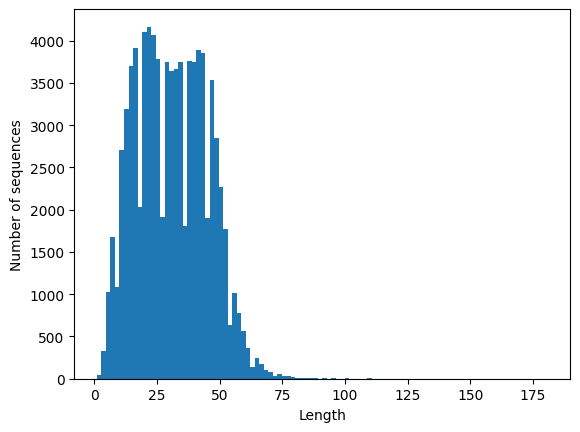

In [ ]:
_ = plt.hist([len(s) for s in X_train_tok], 100)
plt.xlabel("Length")
plt.ylabel("Number of sequences")

In [ ]:
max_seq_len = 50

# clip sequences: for each element in X_train_tok and X_test_tok, truncate the length of each entry at max_seq_len. Ignore what comes after.
# therefore each element has length at most max_seq_len
# hint: list comprehension is your friend, or this can be done with a loop
X_train_tok = [s[:max_seq_len] for s in X_train_tok]# TODO
X_test_tok = [s[:max_seq_len] for s in X_test_tok]# TODO

# create masks
mask_train = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_train_tok]
mask_test = [[1]*len(s)+[0]*(max_seq_len-len(s)) for s in X_test_tok]

# pad sequences: for each element in X_train_tok and X_test_tok, pad each
# element at the end with 0s such that each element has length exactly max_seq_len
X_train_tok = [s + [0] * (max_seq_len - len(s)) for s in X_train_tok]# TODO
X_test_tok = [s + [0] * (max_seq_len - len(s)) for s in X_test_tok]# TODO


train_dset = torch.utils.data.TensorDataset(torch.tensor(X_train_tok,
                                                         dtype=torch.long),
                                            torch.tensor(y_train,
                                                         dtype=torch.long),
                                            torch.tensor(mask_train,
                                                         dtype=torch.float))

test_dset = torch.utils.data.TensorDataset(torch.tensor(X_test_tok,
                                                        dtype=torch.long),
                                          torch.tensor(y_test,
                                                        dtype=torch.long),
                                          torch.tensor(mask_test,
                                                        dtype=torch.float))

batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=2
                         )

test_loader = torch.utils.data.DataLoader(test_dset,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=2
                         )



In [ ]:
lstm = RNNClassifier(embedding_dim = 128, hidden_dim = 128, vocab_size = tokenizer.vocab_size, num_rec_layers = 1, rec_layer = nn.LSTM)
lstm.to(device)
learning_rate = 0.01
optimizer = optim.RMSprop(lstm.parameters(), lr=learning_rate)
lossfun = nn.BCELoss(reduction='mean')
a, b, c, d = train(train_loader, test_loader, lstm, lossfun, \
                   optimizer, device, num_epochs=15)

Epoch:   1/ 15 Training Loss: 0.147, Testing Loss: 0.198, Training Acc: 0.952, Testing Acc: 0.926
Epoch:   2/ 15 Training Loss: 0.078, Testing Loss: 0.173, Training Acc: 0.978, Testing Acc: 0.936
Epoch:   3/ 15 Training Loss: 0.054, Testing Loss: 0.198, Training Acc: 0.985, Testing Acc: 0.930
Epoch:   4/ 15 Training Loss: 0.037, Testing Loss: 0.216, Training Acc: 0.989, Testing Acc: 0.931
Epoch:   5/ 15 Training Loss: 0.025, Testing Loss: 0.224, Training Acc: 0.993, Testing Acc: 0.931
Epoch:   6/ 15 Training Loss: 0.019, Testing Loss: 0.261, Training Acc: 0.995, Testing Acc: 0.930
Epoch:   7/ 15 Training Loss: 0.016, Testing Loss: 0.301, Training Acc: 0.996, Testing Acc: 0.929
Epoch:   8/ 15 Training Loss: 0.019, Testing Loss: 0.359, Training Acc: 0.994, Testing Acc: 0.924
Epoch:   9/ 15 Training Loss: 0.013, Testing Loss: 0.334, Training Acc: 0.996, Testing Acc: 0.927
Epoch:  10/ 15 Training Loss: 0.012, Testing Loss: 0.374, Training Acc: 0.996, Testing Acc: 0.927
Epoch:  11/ 15 Train

In [ ]:
def predict(text):
    text = process_string(text) # initial preprocessing
    # convert to a torch tensor of needed shape and on the needed device
    tensor = torch.tensor(tokenizer.encode(text)[:max_seq_len]).long()
    tensor = tensor.unsqueeze(0).to(device)
    mask = torch.ones(1, tensor.shape[1]).float().to(device)
    # network's prediction
    pred_rnn = lstm(tensor, mask).item()
    print("RNN prediction:", "positive" if pred_rnn>0.5 else "negative")

In [ ]:
predict("This is a nice movie with my favourite actors")

RNN prediction: positive


In [ ]:
predict("Don't spend your evening on this")

RNN prediction: negative


In [ ]:
predict("I am a deep learning researcher")

RNN prediction: positive


In [ ]:
predict("This is not a good example of a bad movie")

RNN prediction: positive


In [ ]:
predict("There is going to be tsunami coming tomorrow")

RNN prediction: positive


So we trained our model on a twitter dataset where we modified the labels by deleting all the records with neutral sentiment and adjust the label to match the label of the original dataset. Now the prediction results seems to improve by a bit because some of the input to these predictions are closer to daily comments which can be better approached by a model trained on twitter texts rather than imdb dataset which might be more limited to a movie-comment situation. However, in terms on the last prediciton, it predicted incorrectly. I have definitely observed changes that depended on the dataset we are feeding the model. For the drawbacks/failures of RNN, I think it heavily relies on the training data we feed. Different training data gives different outputs and predictions. Additionally, since we have a binary output, which sometimes might be inaccurate because it doesn't contain a neutral label, therefore, RNN failed to capture that as it wasn't provided to the model.

### Additional example: trying bidirectional RNNs. We talked briefly about bidirectional RNNs in class. The code in this section is not graded but it's here for you to play with.

Question: Explain in a sentence or two each: (a) how do bidirectional RNNs work? (b) Why are they useful? (2 points)

Below a bidirectional RNN is implemented, following tips from [this example](https://github.com/PacktPublishing/Mastering-PyTorch/blob/master/Chapter04/lstm.ipynb), but it does not improve performance over what we already have.

In [ ]:
def cuda_pack_padded_sequence(input, lengths):
    lengths = torch.as_tensor(lengths, dtype=torch.int64)
    lengths = lengths.cpu()
    lengths, sorted_indices = torch.sort(lengths, descending=True)
    sorted_indices = sorted_indices.to(input.device)
    input = input.index_select(1, sorted_indices) # batch first = False

    data, batch_sizes = \
    torch._C._VariableFunctions._pack_padded_sequence(input, lengths, batch_first=False)
    return torch.nn.utils.rnn.PackedSequence(data, batch_sizes, sorted_indices)

In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, \
                 bidirectional=False):
        super(RNNClassifier, self).__init__()
        # define all layers we need,
        # their parameters will be initialized automatically
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, batch_first=True,
                              bidirectional=bidirectional)
        self.bidirectional = bidirectional
        self.hidden2label = nn.Linear(hidden_dim*(2 if bidirectional else 1), 1)

    def forward(self, sentences, mask):
        # sentences shape: [B, L], mask shape: [B, L]
        embedding = self.word_embeddings(sentences) # shape: [B, L, DE]
        if self.bidirectional:
          if torch.cuda.is_available():
              embedding = cuda_pack_padded_sequence(embedding, \
                                                lengths=mask.sum(dim=1))
              # actually, code in the else branch should work for both cases,
              # but due to some bug it appears not to work
          else:
              embedding = nn.utils.rnn.pack_padded_sequence(embedding, \
                                                          lengths=mask.sum(dim=1))
        out, hidden = self.rnn(embedding) # out shape: [B, L, DH]
        if self.bidirectional:
            out, _ = nn.utils.rnn.pad_packed_sequence(out)
            out = out.permute(1, 0, 2)
        out = (out*mask[:, :, None]).mean(dim=1) # shape: [B, DH]
        res = self.hidden2label(out) # shape: [B, 1]
        return torch.sigmoid(res)

In [ ]:
rnn = RNNClassifier(512, 512, tokenizer.vocab_size, bidirectional=True)
rnn.to(device)
optimizer = optim.RMSprop(rnn.parameters(), lr=0.001)
a, b, c, d = train(train_loader, test_loader, rnn, lossfun, \
                   optimizer, device, num_epochs=15)

Epoch:   1/ 15 Training Loss: 0.270, Testing Loss: 0.353, Training Acc: 0.903, Testing Acc: 0.860
Epoch:   2/ 15 Training Loss: 0.161, Testing Loss: 0.299, Training Acc: 0.950, Testing Acc: 0.883
Epoch:   3/ 15 Training Loss: 0.106, Testing Loss: 0.368, Training Acc: 0.970, Testing Acc: 0.861
Epoch:   4/ 15 Training Loss: 0.063, Testing Loss: 0.386, Training Acc: 0.982, Testing Acc: 0.873
Epoch:   5/ 15 Training Loss: 0.013, Testing Loss: 0.560, Training Acc: 0.997, Testing Acc: 0.877
Epoch:   6/ 15 Training Loss: 0.007, Testing Loss: 0.608, Training Acc: 0.999, Testing Acc: 0.880
Epoch:   7/ 15 Training Loss: 0.005, Testing Loss: 0.661, Training Acc: 0.999, Testing Acc: 0.877
Epoch:   8/ 15 Training Loss: 0.007, Testing Loss: 0.477, Training Acc: 0.999, Testing Acc: 0.883
Epoch:   9/ 15 Training Loss: 0.006, Testing Loss: 0.474, Training Acc: 1.000, Testing Acc: 0.882
Epoch:  10/ 15 Training Loss: 0.014, Testing Loss: 0.371, Training Acc: 1.000, Testing Acc: 0.884
Epoch:  11/ 15 Train

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to pdf /content/Fang_Assignment3.ipynb

[NbConvertApp] Converting notebook /content/Fang_Assignment3.ipynb to pdf
[NbConvertApp] Support files will be in Fang_Assignment3_files/
[NbConvertApp] Making directory ./Fang_Assignment3_files
[NbConvertApp] Making directory ./Fang_Assignment3_files
[NbConvertApp] Writing 229188 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 225294 bytes to /content/Fang_Assignment3.pdf
